# * prediction of sales based on various features

# *Hi guys here is the model to predict the sales based on advertisements. this is the simple linear regression model
~developed by "krishna kumar"

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# upload data
marketing= pd.read_csv("C:/Users/lenovo/Desktop/myproject/new data/marketing.csv")

In [7]:
# check the number of rows and columns in the data
marketing.shape

(171, 4)

In [10]:
# get the information about the data
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.4 KB


In [11]:
# calculate the overall statistics of the data
marketing.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [13]:
# view the first few rows and columns of the data
marketing.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


<Figure size 864x432 with 0 Axes>

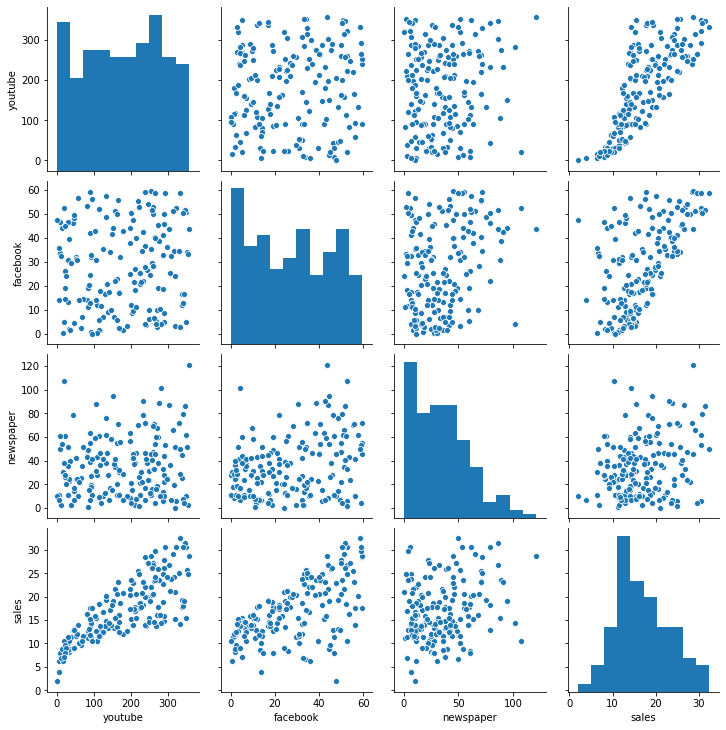

In [14]:
# visualise the data
plt.figure(figsize= (12,6))    # to adjust the size of the figure 
sns.pairplot(marketing)        # to draw the pariplot

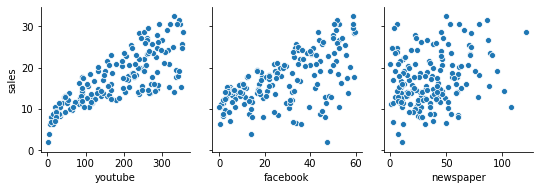

In [33]:
# to make the indivisual plots
sns.pairplot(data= marketing, x_vars= ["youtube", "facebook", "newspaper"], y_vars= "sales")

In [34]:
# here sales of youtube are highly correlated, we will make a model on these two variables

In [38]:
X= marketing["youtube"]
y= marketing["sales"]

In [39]:
# import libraries for split the data and for modeling
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

In [40]:
# split thr data into train set and test set

In [42]:
X_train, X_test, y_train, y_test= train_test_split( X, y, train_size= 0.70, random_state= 100)

In [43]:
# check the train data for X
X_train.head()

110    221.88
92      22.56
124    205.56
85      93.84
139    258.48
Name: youtube, dtype: float64

In [45]:
# check the train data for y
y_train.head()

110    24.84
92      8.40
124    22.80
85     17.52
139    20.52
Name: sales, dtype: float64

In [46]:
# add constant to X_train
X_train_sm= sm.add_constant(X_train)


In [49]:
# check the data with added contant
X_train_sm.head()

,const,youtube
110,1.0,221.88
92,1.0,22.56
124,1.0,205.56
85,1.0,93.84
139,1.0,258.48


In [53]:
# make the linear model based on LEAST SUM SQUARE METHOD
model= sm.OLS(y_train, X_train_sm)
model_fit= model.fit()

In [54]:
# print summary of the model
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     186.8
Date:                Fri, 03 Jul 2020   Prob (F-statistic):           5.31e-26
Time:                        17:27:56   Log-Likelihood:                -327.53
No. Observations:                 119   AIC:                             659.1
Df Residuals:                     117   BIC:                             664.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4571      0.694     12.193      0.0

In [55]:
# here p-value , F-statistics , R-squared are in acceptable range
# now we will draw graph of linear mode

In [56]:
res= model_fit.predict(X_train_sm)

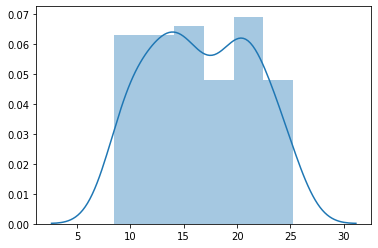

In [61]:
#distribution of residuals 
sns.distplot(res)
plt.show()

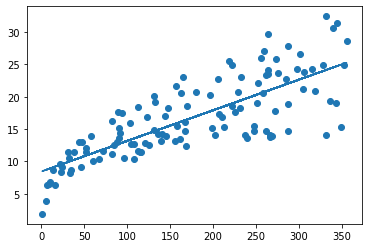

In [62]:
# now plot the best fitted line

plt.scatter(X_train, y_train)
plt.plot(X_train, 8.4571+ X_train*0.0472)
plt.show()

# this is the best fitted line for train values

In [63]:
# now we will perform the same method on test values

In [65]:
# check test values
X_test.head()

40     260.16
117    288.12
69     347.64
162     90.60
125    225.36
Name: youtube, dtype: float64

In [66]:
y_test.head()

40     26.76
117    15.84
69     30.48
162    11.88
125    18.72
Name: sales, dtype: float64

In [67]:
# add constant to X_test
X_test_sm= sm.add_constant(X_test)

In [69]:
# check x_test with added constant
X_test_sm.head()

,const,youtube
40,1.0,260.16
117,1.0,288.12
69,1.0,347.64
162,1.0,90.60
125,1.0,225.36


In [70]:
# Build the model

In [71]:
model2= sm.OLS(y_test, X_test_sm)
model2_fit= model2.fit()

In [73]:
# View the summary of model

print(model2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     75.50
Date:                Fri, 03 Jul 2020   Prob (F-statistic):           1.46e-11
Time:                        17:40:16   Log-Likelihood:                -148.36
No. Observations:                  52   AIC:                             300.7
Df Residuals:                      50   BIC:                             304.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0878      1.243      6.506      0.0

In [74]:
# here p-value, F - stats, R- squared are in acceptable range, so the model is perfect on on both train vailues and test values

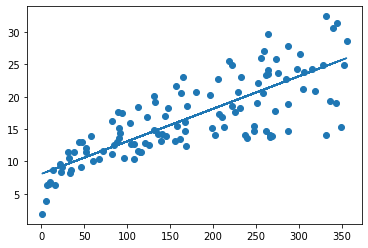

In [75]:
plt.scatter(X_train, y_train)
plt.plot(X_train,  8.0878+ X_train*0.0502)
plt.show()

# this is the best fit line for test values

hence this is the best fit model to predict sales with youtube advertisements